In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot, iplot
import folium

plt.rcParams['figure.figsize']=18,8

In [3]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
df = pd.read_excel(r"C:\Users\Dell\Desktop\Projects\COVID-19 analysis\Data\Covid cases in India.xlsx")

In [5]:
df.head()

S. No. Name of State / UT  Total Confirmed cases (Indian National)  \
0       1     Andhra Pradesh                                       12   
1       2       Chhattisgarh                                        6   
2       3              Delhi                                       38   
3       4            Gujarat                                       43   
4       5            Haryana                                       16   

   Total Confirmed cases ( Foreign National )  Cured  Death  
0                                           0      1      0  
1                                           0      0      0  
2                                           1      6      1  
3                                           0      0      3  
4                                          14     11      0

In [6]:
df.drop(['S. No.'], axis=1, inplace=True)

In [7]:
df['Total Cases']=df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']

In [8]:
total_cases_overall=df['Total Cases'].sum()
print('The total number of cases till "27th March 2020" in India is ',total_cases_overall)

The total number of cases till "27th March 2020" in India is  729


In [9]:
df['Active Cases']=df['Total Cases']-(df['Death']+df['Cured'])
df.head()

Name of State / UT  Total Confirmed cases (Indian National)  \
0     Andhra Pradesh                                       12   
1       Chhattisgarh                                        6   
2              Delhi                                       38   
3            Gujarat                                       43   
4            Haryana                                       16   

   Total Confirmed cases ( Foreign National )  Cured  Death  Total Cases  \
0                                           0      1      0           12   
1                                           0      0      0            6   
2                                           1      6      1           39   
3                                           0      0      3           43   
4                                          14     11      0           30   

   Active Cases  
0            11  
1             6  
2            32  
3            40  
4            19

In [10]:
df.style.background_gradient(cmap='Reds')

In [11]:
Total_Active_Cases = df.groupby('Name of State / UT')['Active Cases'].sum().sort_values(ascending=False).to_frame()
Total_Active_Cases

Active Cases
Name of State / UT              
Maharashtra                  128
Kerala                       127
Telengana                     44
Rajasthan                     40
Gujarat                       40
Tamil Nadu                    33
Uttar Pradesh                 32
Delhi                         32
Punjab                        28
Madhya Pradesh                22
Haryana                       19
Jammu and Kashmir             16
Karnataka                     15
Ladakh                        13
Andhra Pradesh                11
West Bengal                   10
Chandigarh                     7
Goa                            6
Chhattisgarh                   6
Bihar                          6
Uttarakhand                    4
Himachal Pradesh               3
Odisha                         3
Manipur                        1
Mizoram                        1
Puducherry                     1

In [12]:
Total_Active_Cases.style.background_gradient(cmap='Reds')

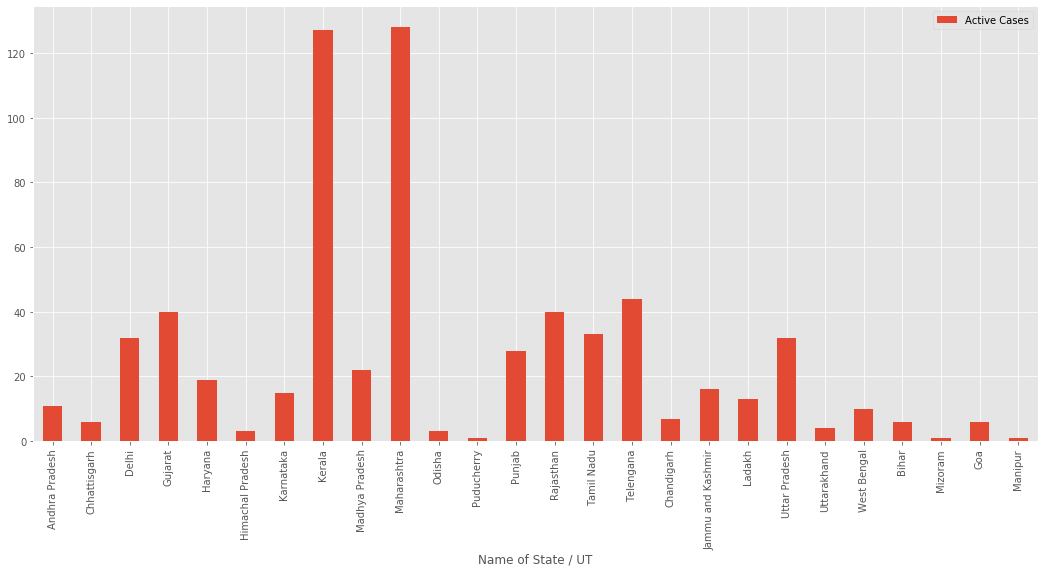

In [13]:
#Pandas visualisation
df.plot(kind='bar', x='Name of State / UT', y='Active Cases')
plt.show()

#Plotly visualisation
df.iplot(kind='bar', x='Name of State / UT', y='Active Cases')

<BarContainer object of 26 artists>

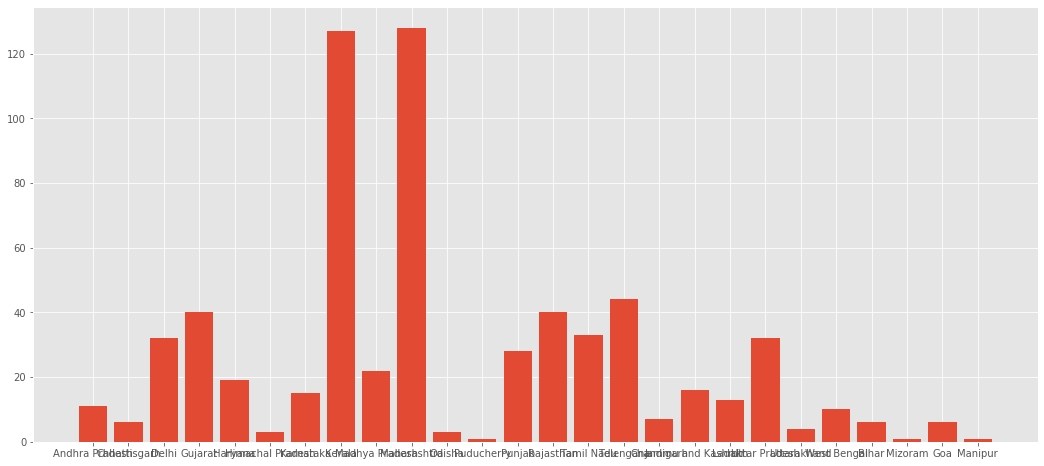

In [14]:
#Matplotlib visualisation
plt.bar(df['Name of State / UT'],df['Active Cases'])

In [15]:
px.bar(df, x='Name of State / UT', y='Active Cases')

In [16]:
df.iplot(kind='scatter',x='Name of State / UT',y='Active Cases', mode="markers+lines", title='Active Cases Count', xTitle='Name of State / UT', 
         yTitle='Active Cases', colors='red', size=20)

px.scatter(df, x='Name of State / UT', y='Active Cases')

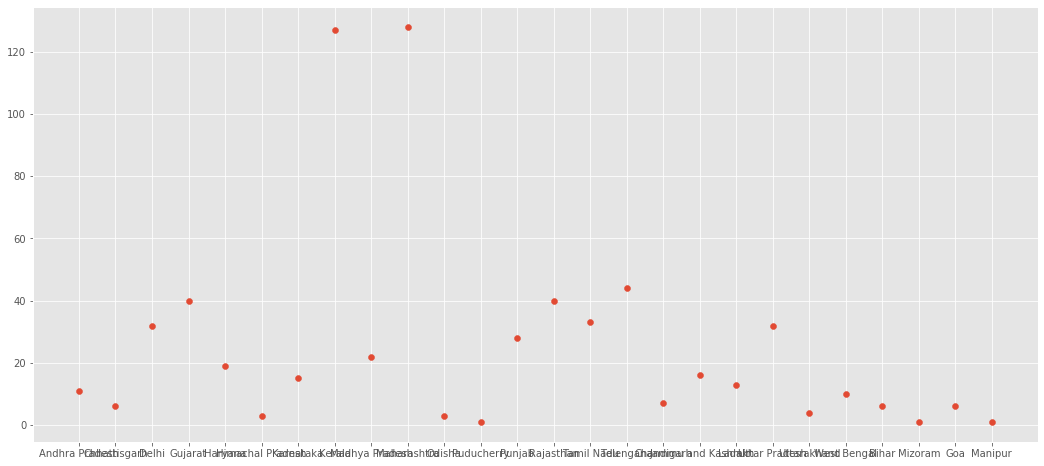

In [17]:
plt.scatter(df['Name of State / UT'],df['Active Cases'])

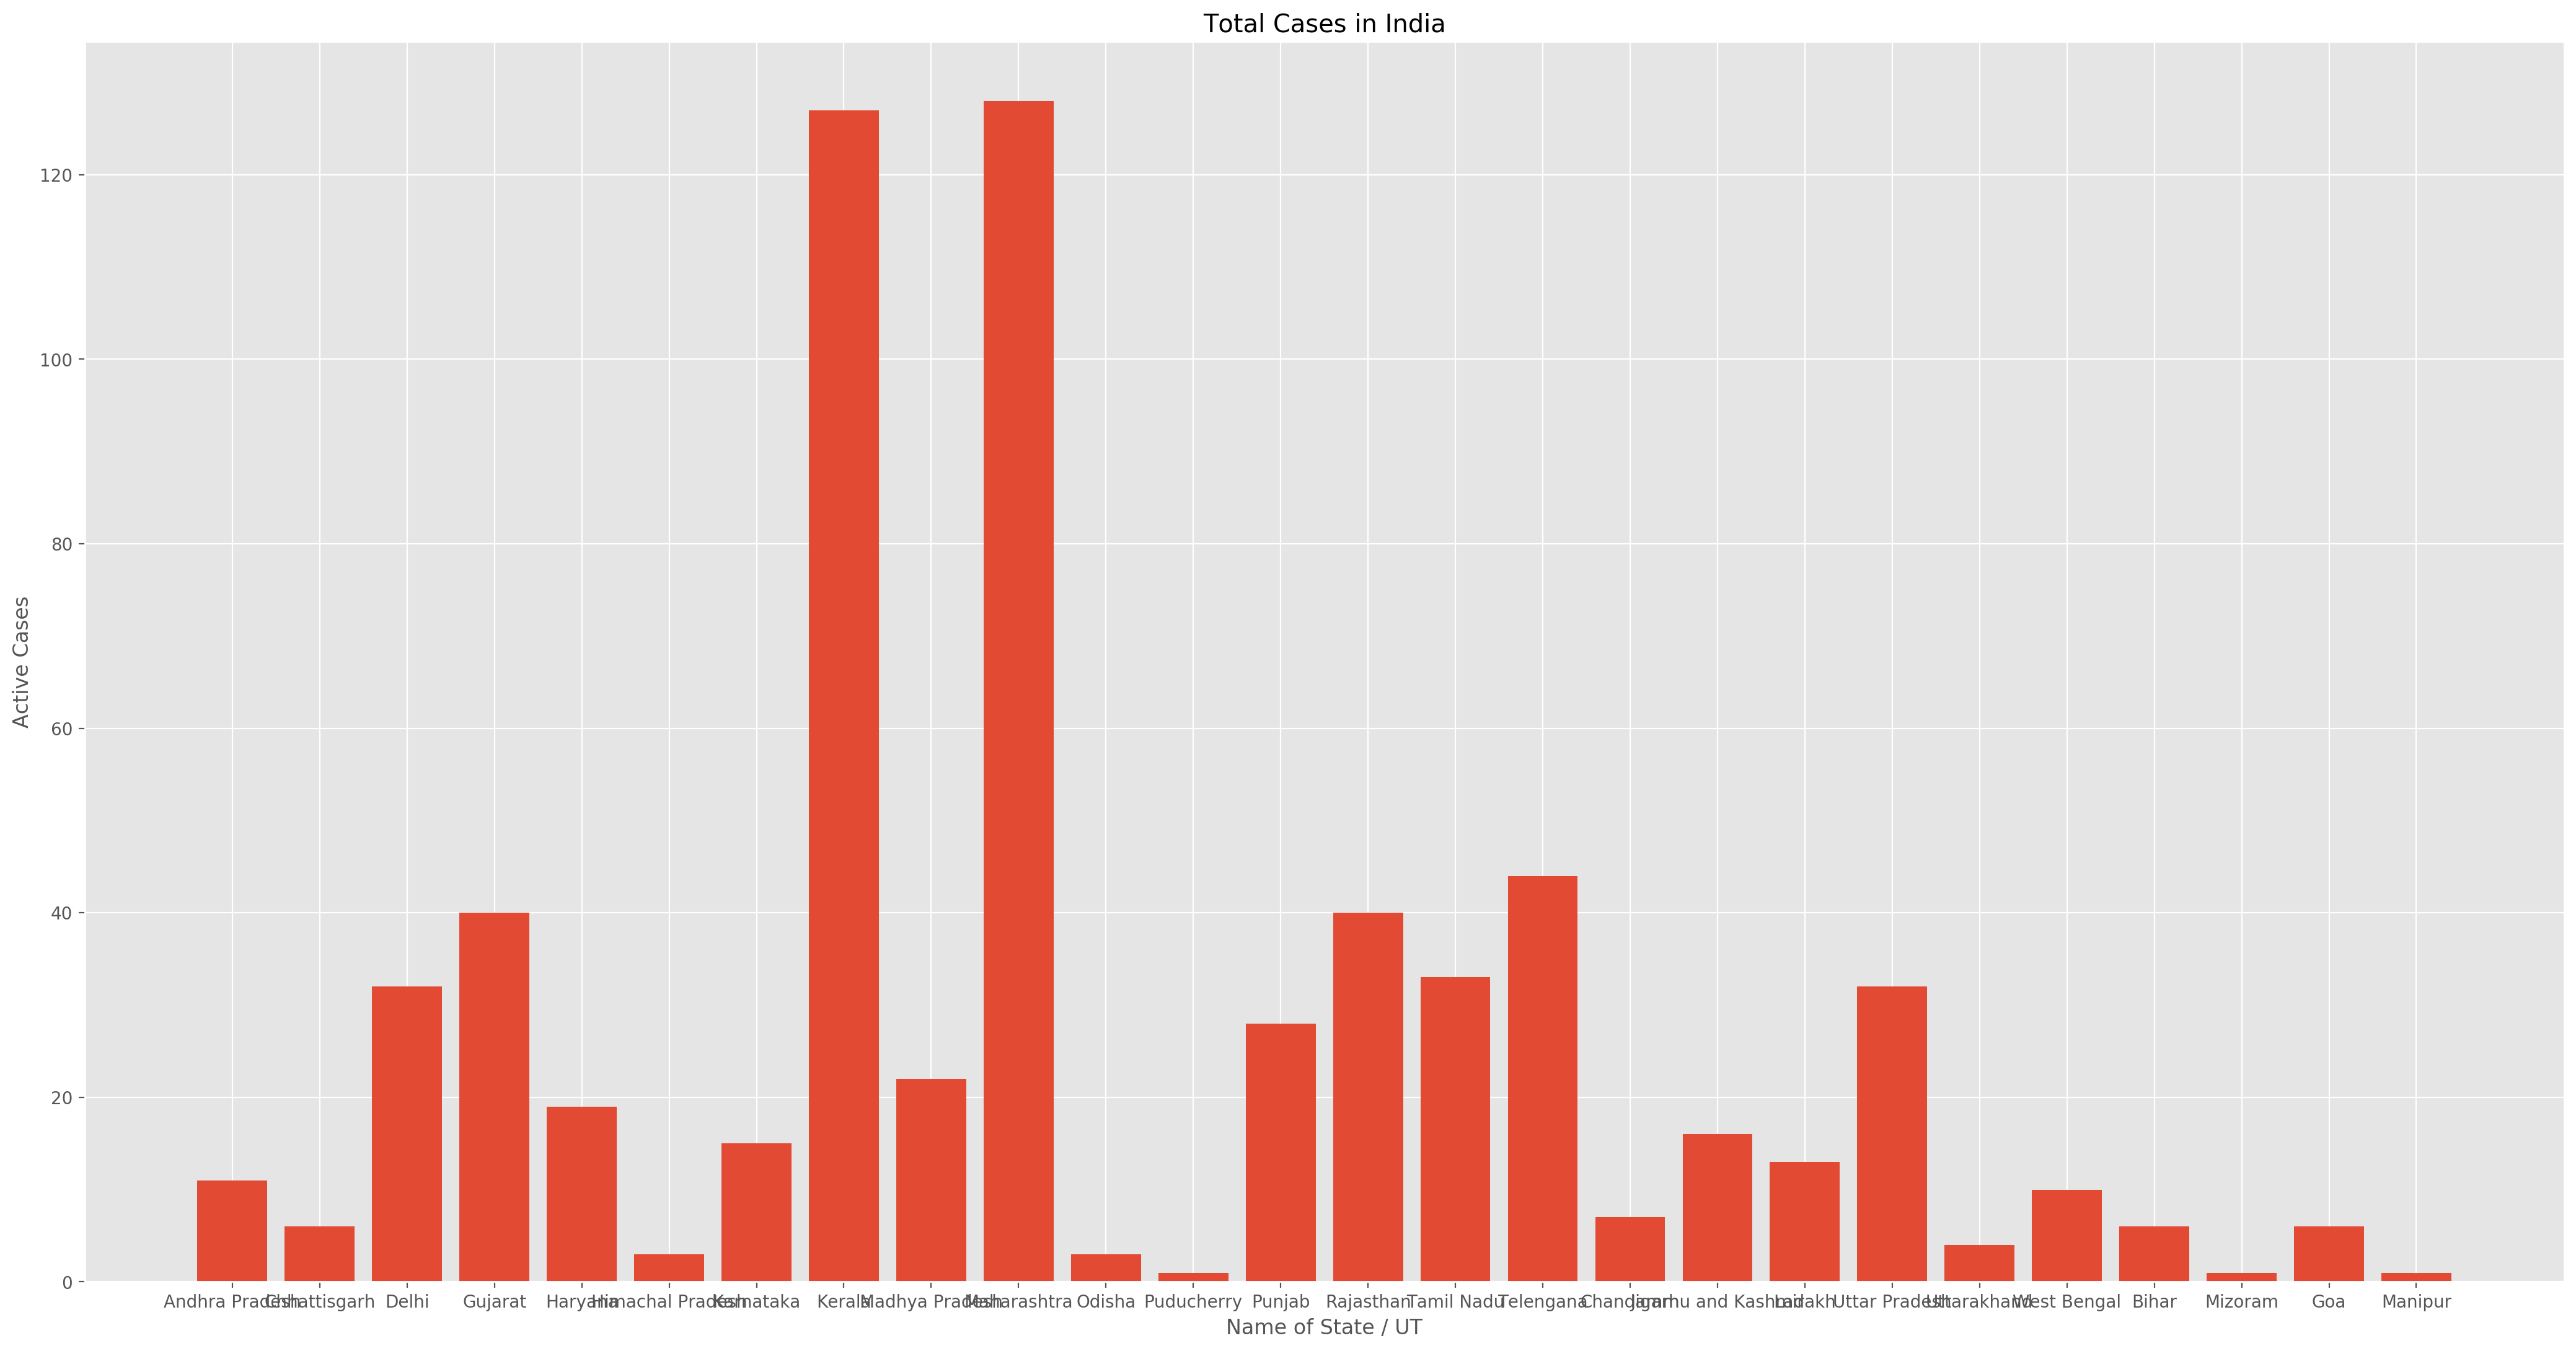

In [18]:
# Object oriented approach
#Matplotlib
fig = plt.figure(figsize=(20,10),dpi=200)
axes = fig.add_axes([0,0,1,1])
axes.bar(df['Name of State / UT'],df['Active Cases'])
axes.set_title("Total Cases in India")
axes.set_xlabel("Name of State / UT")
axes.set_ylabel("Active Cases")
plt.show()

#Plotly
fig = go.Figure()
fig.add_trace(go.Bar(x=df['Name of State / UT'],y=df['Active Cases']))
fig.update_layout(title='Total Cases in India',xaxis=dict(title='Name of State / UT'),yaxis=dict(title='Active Cases'))

In [19]:
indian_cord = pd.read_excel(r'C:\Users\Dell\Desktop\Projects\COVID-19 analysis\Data\Indian Coordinates.xlsx')
indian_cord

Name of State / UT   Latitude  Longitude
0                   Andaman And Nicobar   11.667026  92.735983
1                         Andhra Pradesh  14.750429  78.570026
2                     Arunachal Pradesh   27.100399  93.616601
3                                 Assam   26.749981  94.216667
4                                 Bihar   25.785414  87.479973
5                            Chandigarh   30.719997  76.780006
6                          Chhattisgarh   22.090420  82.159987
7                Dadra And Nagar Haveli   20.266578  73.016618
8                                  Delhi  28.669993  77.230004
9                                   Goa   15.491997  73.818001
10                               Haryana  28.450006  77.019991
11                     Himachal Pradesh   31.100025  77.166597
12  Union Territory of Jammu and Kashmir  33.450000  76.240000
13                            Jharkhand   23.800393  86.419986
14                             Karnataka  12.570381  76.919997
15                                Kerala   8.900373  76.569993
16                          Lakshadweep   10.562573  72.636867
17                       Madhya Pradesh   21.300391  76.130019
18                           Maharashtra  19.250232  73.160175
19                              Manipur   24.799971  93.950017
20                            Meghalaya   25.570492  91.880014
21                              Mizoram   23.710399  92.720015
22                             Nagaland   25.666998  94.116570
23                               Orissa   19.820430  85.900017
24                           Puducherry   11.934994  79.830000
25                                Punjab  31.519974  75.980003
26                             Rajasthan  26.449999  74.639981
27                               Sikkim   27.333330  88.616647
28                             Telengana  18.112400  79.019300
29                            Tamil Nadu  12.920386  79.150042
30                              Tripura   23.835404  91.279999
31                         Uttar Pradesh  27.599981  78.050006
32                           Uttarakhand  30.320409  78.050006
33                          West Bengal   22.580390  88.329947
34             Union Territory of Ladakh  34.100000  77.340000

In [20]:
df_full = pd.merge(indian_cord, df, on='Name of State / UT')
df_full

Name of State / UT   Latitude  Longitude  \
0      Andhra Pradesh  14.750429  78.570026   
1               Delhi  28.669993  77.230004   
2             Haryana  28.450006  77.019991   
3           Karnataka  12.570381  76.919997   
4              Kerala   8.900373  76.569993   
5         Maharashtra  19.250232  73.160175   
6              Punjab  31.519974  75.980003   
7           Rajasthan  26.449999  74.639981   
8           Telengana  18.112400  79.019300   
9          Tamil Nadu  12.920386  79.150042   
10      Uttar Pradesh  27.599981  78.050006   
11        Uttarakhand  30.320409  78.050006   

    Total Confirmed cases (Indian National)  \
0                                        12   
1                                        38   
2                                        16   
3                                        20   
4                                       131   
5                                       144   
6                                        29   
7                                        41   
8                                        34   
9                                        32   
10                                       42   
11                                        4   

    Total Confirmed cases ( Foreign National )  Cured  Death  Total Cases  \
0                                            0      1      0           12   
1                                            1      6      1           39   
2                                           14     11      0           30   
3                                            0      3      2           20   
4                                            7     11      0          138   
5                                            3     15      4          147   
6                                            0      0      1           29   
7                                            2      3      0           43   
8                                           11      1      0           45   
9                                            3      1      1           35   
10                                           1     11      0           43   
11                                           0      0      0            4   

    Active Cases  
0             11  
1             32  
2             19  
3             15  
4            127  
5            128  
6             28  
7             40  
8             44  
9             33  
10            32  
11             4

In [21]:
map=folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')

for lat,long,value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total Cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.8,popup=('<strong>State</strong>: '+str(name).capitalize()+
                                                           '<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),
                        color='red',fill_color='red',fill_opacity=0.3).add_to(map)
map

In [22]:
# Data about rising of the virus

data_India=pd.read_excel(r"C:\Users\Dell\Desktop\Projects\COVID-19 analysis\Data\per_day_cases.xlsx",parse_dates=True,sheet_name="India")
data_Italy=pd.read_excel(r"C:\Users\Dell\Desktop\Projects\COVID-19 analysis\Data\per_day_cases.xlsx",parse_dates=True,sheet_name="Italy")
data_Korea=pd.read_excel(r"C:\Users\Dell\Desktop\Projects\COVID-19 analysis\Data\per_day_cases.xlsx",parse_dates=True,sheet_name="Korea")
data_Wuhan=pd.read_excel(r"C:\Users\Dell\Desktop\Projects\COVID-19 analysis\Data\per_day_cases.xlsx",parse_dates=True,sheet_name="Wuhan")

data_India

Date  Total Cases  New Cases  Days after surpassing 100 cases
0  2020-01-30            1          1                              NaN
1  2020-01-31            1          0                              NaN
2  2020-02-01            1          0                              NaN
3  2020-02-02            2          1                              NaN
4  2020-02-03            3          1                              NaN
5  2020-02-04            3          0                              NaN
6  2020-02-05            3          0                              NaN
7  2020-02-06            3          0                              NaN
8  2020-02-07            3          0                              NaN
9  2020-02-08            3          0                              NaN
10 2020-02-09            3          0                              NaN
11 2020-02-10            3          0                              NaN
12 2020-02-11            3          0                              NaN
13 2020-02-12            3          0                              NaN
14 2020-02-13            3          0                              NaN
15 2020-02-14            3          0                              NaN
16 2020-02-15            3          0                              NaN
17 2020-02-16            3          0                              NaN
18 2020-02-17            3          0                              NaN
19 2020-02-18            3          0                              NaN
20 2020-02-19            3          0                              NaN
21 2020-02-20            3          0                              NaN
22 2020-02-21            3          0                              NaN
23 2020-02-22            3          0                              NaN
24 2020-02-23            3          0                              NaN
25 2020-02-24            3          0                              NaN
26 2020-02-25            3          0                              NaN
27 2020-02-26            3          0                              NaN
28 2020-02-27            3          0                              NaN
29 2020-02-28            3          0                              NaN
30 2020-02-29            3          0                              NaN
31 2020-03-01            3          0                              NaN
32 2020-03-02            6          3                              NaN
33 2020-03-03            9          3                              NaN
34 2020-03-04           28         19                              NaN
35 2020-03-05           30          2                              NaN
36 2020-03-06           31          1                              NaN
37 2020-03-07           34          3                              NaN
38 2020-03-08           39          5                              NaN
39 2020-03-09           43          4                              NaN
40 2020-03-10           56         13                              NaN
41 2020-03-11           62          6                              NaN
42 2020-03-12           73         11                              NaN
43 2020-03-13           82          9                              NaN
44 2020-03-14          102         20                              0.0
45 2020-03-15          113         11                              1.0
46 2020-03-16          119          6                              2.0
47 2020-03-17          142         23                              3.0
48 2020-03-18          156         14                              4.0
49 2020-03-19          194         38                              5.0
50 2020-03-20          244         50                              6.0
51 2020-03-21          271         27                              7.0

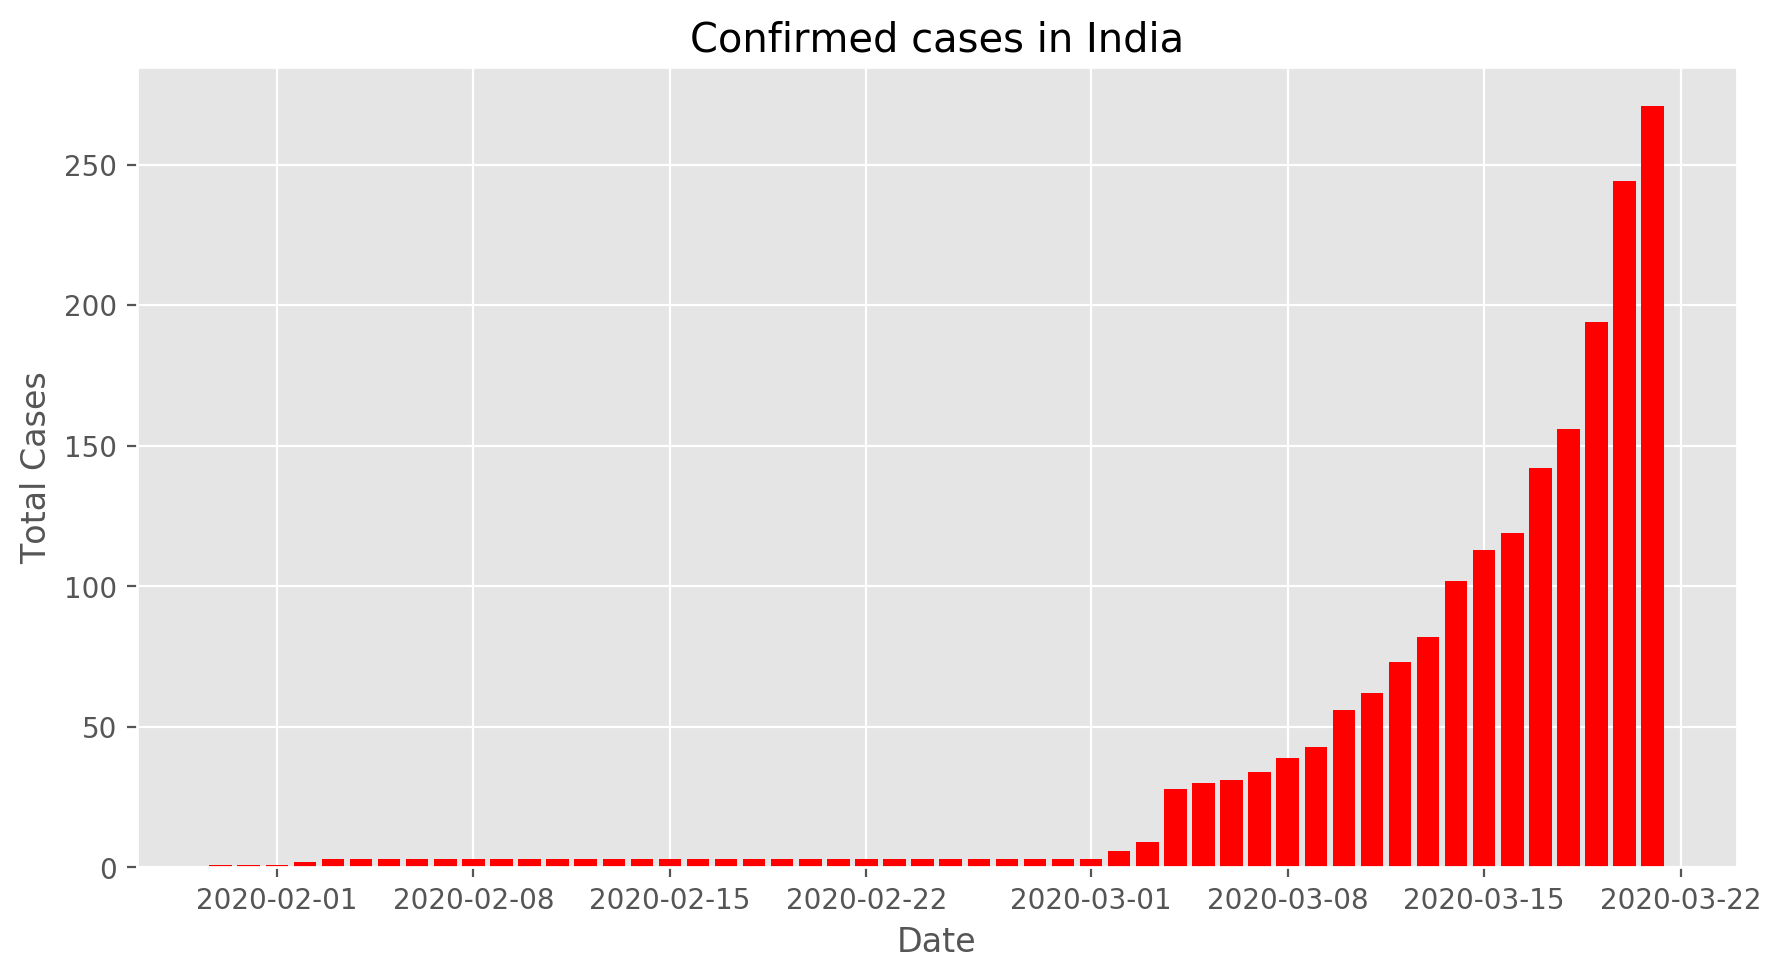

In [23]:
#Matplotlib
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(data_India["Date"],data_India["Total Cases"],color='red')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confirmed cases in India")
plt.show()


#Plotly Express

fig=px.bar(data_India,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in India')
fig.show()

In [24]:
fig=px.bar(data_Italy,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Italy')
fig.show()

fig=px.bar(data_Korea,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Korea')
fig.show()

fig=px.bar(data_Wuhan,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Wuhan')
fig.show()

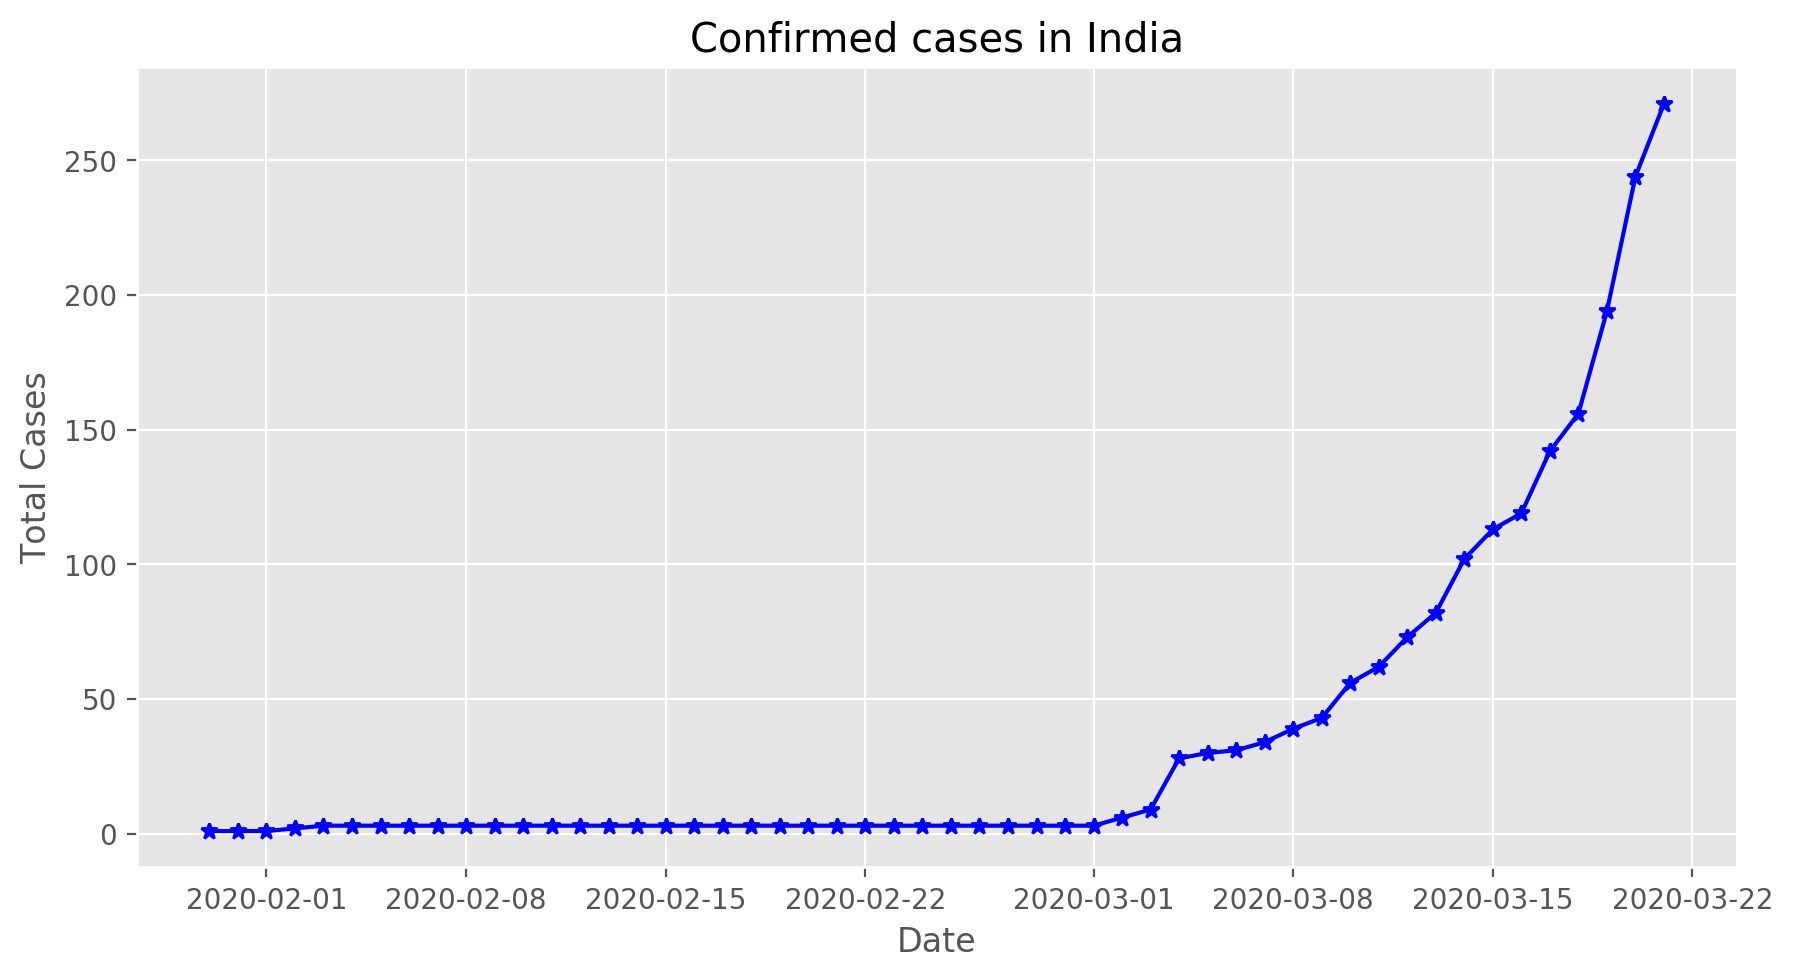

In [25]:
#Matplotlib
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(data_India["Date"],data_India["Total Cases"],color='blue',marker='*')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confirmed cases in India")
plt.show()


#Plotly Express
fig=px.scatter(data_India,x="Date",y="Total Cases", color='Total Cases', title='Confirmed cases in India')
fig.show()

#Plotly
data_India.iplot(kind='scatter',x='Date',y='Total Cases',mode='lines+markers')

In [26]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=data_India['Date'],y=data_India['Total Cases'],mode='lines+markers'))

In [27]:
#Subplots

fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Bar(x=data_Korea['Date'],y=data_Korea['Total Cases'],
                    marker=dict(color=data_Korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Bar(x=data_Italy['Date'],y=data_Italy['Total Cases'],
                    marker=dict(color=data_Italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Bar(x=data_India['Date'],y=data_India['Total Cases'],
                    marker=dict(color=data_India['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Bar(x=data_Wuhan['Date'],y=data_Wuhan['Total Cases'],
                    marker=dict(color=data_Wuhan['Total Cases'],coloraxis="coloraxis")),2,2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Cases in 4 Countries")

fig.update_layout(plot_bgcolor='rgb(230,230,230)')

In [28]:
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Scatter(x=data_Korea['Date'],y=data_Korea['Total Cases'],
                    marker=dict(color=data_Korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Scatter(x=data_Italy['Date'],y=data_Italy['Total Cases'],
                    marker=dict(color=data_Italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Scatter(x=data_India['Date'],y=data_India['Total Cases'],
                    marker=dict(color=data_India['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Scatter(x=data_Wuhan['Date'],y=data_Wuhan['Total Cases'],
                    marker=dict(color=data_Wuhan['Total Cases'],coloraxis="coloraxis")),2,2)



fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Cases in 4 Countries")

fig.update_layout(plot_bgcolor='rgb(230,230,230)')

In [29]:
#Global analysis 
df=pd.read_csv(r'C:\Users\Dell\Desktop\Projects\COVID-19 analysis\Data\covid_19_data.csv',parse_dates=['Last Update'])

In [30]:
df.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)
df

SNo        Date                Province/State  \
0        1  01/22/2020                         Anhui   
1        2  01/22/2020                       Beijing   
2        3  01/22/2020                     Chongqing   
3        4  01/22/2020                        Fujian   
4        5  01/22/2020                         Gansu   
...    ...         ...                           ...   
5885  5886  03/15/2020                     Gibraltar   
5886  5887  03/15/2020                           NaN   
5887  5888  03/15/2020  Diamond Princess cruise ship   
5888  5889  03/15/2020                 West Virginia   
5889  5890  03/15/2020                           NaN   

                             Country         Last Update  Confirmed  Deaths  \
0                     Mainland China 2020-01-22 17:00:00        1.0     0.0   
1                     Mainland China 2020-01-22 17:00:00       14.0     0.0   
2                     Mainland China 2020-01-22 17:00:00        6.0     0.0   
3                     Mainland China 2020-01-22 17:00:00        1.0     0.0   
4                     Mainland China 2020-01-22 17:00:00        0.0     0.0   
...                              ...                 ...        ...     ...   
5885                              UK 2020-03-14 16:33:03        1.0     0.0   
5886                      Uzbekistan 2020-03-15 18:20:19        1.0     0.0   
5887                       Australia 2020-03-14 02:33:04        0.0     0.0   
5888                              US 2020-03-10 02:33:04        0.0     0.0   
5889  occupied Palestinian territory 2020-03-11 20:53:02        0.0     0.0   

      Recovered  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
...         ...  
5885        1.0  
5886        0.0  
5887        0.0  
5888        0.0  
5889        0.0  

[5890 rows x 8 columns]

In [31]:
df.query('Country=="US"')

SNo        Date        Province/State Country         Last Update  \
31      32  01/22/2020            Washington      US 2020-01-22 17:00:00   
69      70  01/23/2020            Washington      US 2020-01-23 17:00:00   
117    118  01/24/2020            Washington      US 2020-01-24 17:00:00   
118    119  01/24/2020               Chicago      US 2020-01-24 17:00:00   
158    159  01/25/2020            Washington      US 2020-01-25 17:00:00   
...    ...         ...                   ...     ...                 ...   
5831  5832  03/15/2020               Wyoming      US 2020-03-15 02:53:03   
5882  5883  03/15/2020                Alaska      US 2020-03-13 14:53:03   
5883  5884  03/15/2020          North Dakota      US 2020-03-12 09:33:03   
5884  5885  03/15/2020  Virgin Islands, U.S.      US 2020-03-14 16:15:18   
5888  5889  03/15/2020         West Virginia      US 2020-03-10 02:33:04   

      Confirmed  Deaths  Recovered  
31          1.0     0.0        0.0  
69          1.0     0.0        0.0  
117         1.0     0.0        0.0  
118         1.0     0.0        0.0  
158         1.0     0.0        0.0  
...         ...     ...        ...  
5831        3.0     0.0        0.0  
5882        1.0     0.0        0.0  
5883        1.0     0.0        0.0  
5884        1.0     0.0        0.0  
5888        0.0     0.0        0.0  

[1218 rows x 8 columns]

In [32]:
df.groupby('Date').sum()

SNo  Confirmed  Deaths  Recovered
Date                                             
01/22/2020      741      555.0    17.0       28.0
01/23/2020     2829      653.0    18.0       30.0
01/24/2020     4305      941.0    26.0       36.0
01/25/2020     6490     1438.0    42.0       39.0
01/26/2020     9071     2118.0    56.0       52.0
01/27/2020    12342     2927.0    82.0       61.0
01/28/2020    15262     5578.0   131.0      107.0
01/29/2020    18711     6165.0   133.0      126.0
01/30/2020    23345     8235.0   171.0      143.0
01/31/2020    28675     9925.0   213.0      222.0
02/01/2020    35309    12038.0   259.0      284.0
02/02/2020    39798    16787.0   362.0      472.0
02/03/2020    44982    19881.0   426.0      623.0
02/04/2020    51135    23892.0   492.0      852.0
02/05/2020    56871    27636.0   564.0     1124.0
02/06/2020    61912    30818.0   634.0     1487.0
02/07/2020    67932    34392.0   719.0     2011.0
02/08/2020    73116    37121.0   806.0     2616.0
02/09/2020    78300    40151.0   906.0     3244.0
02/10/2020    83484    42763.0  1013.0     3946.0
02/11/2020    89936    44803.0  1113.0     4683.0
02/12/2020    95265    45222.0  1118.0     5150.0
02/13/2020   102009    60370.0  1371.0     6295.0
02/14/2020   108975    66887.0  1523.0     8058.0
02/15/2020   114600    69032.0  1666.0     9395.0
02/16/2020   120225    71226.0  1770.0    10865.0
02/17/2020   125850    73260.0  1868.0    12583.0
02/18/2020   131475    75138.0  2007.0    14352.0
02/19/2020   138966    75641.0  2122.0    16121.0
02/20/2020   144742    76199.0  2247.0    18177.0
02/21/2020   166698    76843.0  2251.0    18890.0
02/22/2020   173754    78599.0  2458.0    22886.0
02/23/2020   183005    78985.0  2469.0    23394.0
02/24/2020   201645    79570.0  2629.0    25227.0
02/25/2020   219255    80415.0  2708.0    27905.0
02/26/2020   245430    81397.0  2770.0    30384.0
02/27/2020   265965    82756.0  2814.0    33277.0
02/28/2020   301245    84124.0  2872.0    36711.0
02/29/2020   328321    86013.0  2941.0    39782.0
03/01/2020   360125    88371.0  2996.0    42716.0
03/02/2020   424974    90309.0  3085.0    45602.0
03/03/2020   477160    92844.0  3160.0    48229.0
03/04/2020   530480    95124.0  3254.0    51171.0
03/05/2020   602386    97886.0  3348.0    53797.0
03/06/2020   729932   101800.0  3460.0    55866.0
03/07/2020   873000   105836.0  3558.0    58359.0
03/08/2020  1050600   109835.0  3803.0    60695.0
03/09/2020  1165213   113582.0  3996.0    62512.0
03/10/2020   950999   118582.0  4262.0    64404.0
03/11/2020  1042740   125865.0  4615.0    67003.0
03/12/2020  1099701   128343.0  4720.0    68324.0
03/13/2020  1211755   145193.0  5404.0    70251.0
03/14/2020  1371492   156099.0  5819.0    72624.0
03/15/2020  1486467   167447.0  6440.0    76034.0

In [33]:
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
death=df.groupby('Date').sum()['Deaths'].reset_index()
rec=df.groupby('Date').sum()['Recovered'].reset_index()

In [34]:
fig=go.Figure()

fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode='lines+markers',name='Confirmed',line=dict(color='blue',width=2)))
fig.add_trace(go.Scatter(x=death['Date'],y=death['Deaths'],mode='lines+markers',name='Deaths',line=dict(color='red',width=2)))
fig.add_trace(go.Scatter(x=rec['Date'],y=rec['Recovered'],mode='lines+markers',name='Recovered',line=dict(color='green',width=2)))

In [35]:
df_confirmed=pd.read_csv(r'C:\Users\Dell\Desktop\Projects\COVID-19 analysis\Data\time_series_covid_19_confirmed.csv')
df

SNo        Date                Province/State  \
0        1  01/22/2020                         Anhui   
1        2  01/22/2020                       Beijing   
2        3  01/22/2020                     Chongqing   
3        4  01/22/2020                        Fujian   
4        5  01/22/2020                         Gansu   
...    ...         ...                           ...   
5885  5886  03/15/2020                     Gibraltar   
5886  5887  03/15/2020                           NaN   
5887  5888  03/15/2020  Diamond Princess cruise ship   
5888  5889  03/15/2020                 West Virginia   
5889  5890  03/15/2020                           NaN   

                             Country         Last Update  Confirmed  Deaths  \
0                     Mainland China 2020-01-22 17:00:00        1.0     0.0   
1                     Mainland China 2020-01-22 17:00:00       14.0     0.0   
2                     Mainland China 2020-01-22 17:00:00        6.0     0.0   
3                     Mainland China 2020-01-22 17:00:00        1.0     0.0   
4                     Mainland China 2020-01-22 17:00:00        0.0     0.0   
...                              ...                 ...        ...     ...   
5885                              UK 2020-03-14 16:33:03        1.0     0.0   
5886                      Uzbekistan 2020-03-15 18:20:19        1.0     0.0   
5887                       Australia 2020-03-14 02:33:04        0.0     0.0   
5888                              US 2020-03-10 02:33:04        0.0     0.0   
5889  occupied Palestinian territory 2020-03-11 20:53:02        0.0     0.0   

      Recovered  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
...         ...  
5885        1.0  
5886        0.0  
5887        0.0  
5888        0.0  
5889        0.0  

[5890 rows x 8 columns]

In [36]:
df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)

In [37]:
df_coordinates=pd.merge(df,df_confirmed,on=['Country','Province/State'])
df_coordinates

SNo        Date        Province/State  \
0       32  01/22/2020            Washington   
1       70  01/23/2020            Washington   
2      118  01/24/2020            Washington   
3      159  01/25/2020            Washington   
4      203  01/26/2020            Washington   
...    ...         ...                   ...   
3285  5879  03/15/2020                   NaN   
3286  5625  03/14/2020                   NaN   
3287  5881  03/15/2020                   NaN   
3288  5628  03/14/2020  Virgin Islands, U.S.   
3289  5885  03/15/2020  Virgin Islands, U.S.   

                               Country         Last Update  Confirmed  Deaths  \
0                                   US 2020-01-22 17:00:00        1.0     0.0   
1                                   US 2020-01-23 17:00:00        1.0     0.0   
2                                   US 2020-01-24 17:00:00        1.0     0.0   
3                                   US 2020-01-25 17:00:00        1.0     0.0   
4                                   US 2020-01-26 16:00:00        1.0     0.0   
...                                ...                 ...        ...     ...   
3285  Saint Vincent and the Grenadines 2020-03-14 16:33:03        1.0     0.0   
3286                          Suriname 2020-03-14 16:33:03        1.0     0.0   
3287                          Suriname 2020-03-14 16:33:03        1.0     0.0   
3288                                US 2020-03-14 16:15:18        1.0     0.0   
3289                                US 2020-03-14 16:15:18        1.0     0.0   

      Recovered      Lat      Long  ...  3/5/20  3/6/20  3/7/20  3/8/20  \
0           0.0  47.4009 -121.4905  ...       0       0       0       0   
1           0.0  47.4009 -121.4905  ...       0       0       0       0   
2           0.0  47.4009 -121.4905  ...       0       0       0       0   
3           0.0  47.4009 -121.4905  ...       0       0       0       0   
4           0.0  47.4009 -121.4905  ...       0       0       0       0   
...         ...      ...       ...  ...     ...     ...     ...     ...   
3285        0.0  12.9843  -61.2872  ...       0       0       0       0   
3286        0.0   3.9193  -56.0278  ...       0       0       0       0   
3287        0.0   3.9193  -56.0278  ...       0       0       0       0   
3288        0.0  18.3358  -64.8963  ...       0       0       0       0   
3289        0.0  18.3358  -64.8963  ...       0       0       0       0   

      3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  
0          0      267      366      442      568      572  
1          0      267      366      442      568      572  
2          0      267      366      442      568      572  
3          0      267      366      442      568      572  
4          0      267      366      442      568      572  
...      ...      ...      ...      ...      ...      ...  
3285       0        0        0        0        0        1  
3286       0        0        0        0        0        1  
3287       0        0        0        0        0        1  
3288       0        0        0        0        0        1  
3289       0        0        0        0        0        1  

[3290 rows x 63 columns]

In [42]:
fig=px.density_mapbox(df_coordinates,lat="Lat",lon="Long",hover_name="Province/State",
                      hover_data=["Confirmed","Deaths","Recovered"], animation_frame="Date",color_continuous_scale="Portland",
                      radius=7,zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases')
fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})